<a href="https://colab.research.google.com/github/TheSpiralArchitect/spiral-resonance-validation/blob/main/Phase4_Cosmic_SRLF_CrossComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --- Install healpy if not already installed ---
!pip install healpy --quiet

# --- Import and process CMB RA/DEC extraction ---
import numpy as np
import healpy as hp

# --- Set input path ---
cmb_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-smica_2048_R3.00_full (1).fits"

# --- Load CMB map and extract valid (unmasked) pixel indices ---
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
valid_pixels = np.where(np.isfinite(cmb_map))[0]

# --- Convert pixel indices to angular coordinates ---
nside = hp.get_nside(cmb_map)
theta, phi = hp.pix2ang(nside, valid_pixels)
ra_cmb = np.degrees(phi)
dec_cmb = 90 - np.degrees(theta)

# --- Save to disk ---
np.save("/content/drive/MyDrive/CMB Data/RA_CMB.npy", ra_cmb)
np.save("/content/drive/MyDrive/CMB Data/DEC_CMB.npy", dec_cmb)

print(f"✅ Saved RA_CMB.npy and DEC_CMB.npy with {len(ra_cmb)} entries.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 22.2 MB/s eta 0:00:00


<ipython-input-9-03b5db6f0975>:12: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)


✅ Saved RA_CMB.npy and DEC_CMB.npy with 50331648 entries.


In [ ]:
import numpy as np

# --- Load regenerated CMB coordinates ---
ra_cmb = np.load("/content/drive/MyDrive/CMB Data/RA_CMB.npy")
dec_cmb = np.load("/content/drive/MyDrive/CMB Data/DEC_CMB.npy")

# --- Spiral Phase Function ---
def spiral_phase(ra, dec, omega=0.4, n=3, epsilon=1e-5):
    theta = np.radians(ra)
    z = np.radians(dec)
    phase = omega * np.log(theta + epsilon) + n * z
    return phase % (2 * np.pi)

# --- Symbol Mapping Function ---
def discretize_to_symbols(phase_array, k=8):
    bins = np.linspace(0, 2 * np.pi, k + 1)
    symbols = np.digitize(phase_array, bins) - 1
    alphabet = np.array(list("ABCDEFGH"))
    return alphabet[symbols]

# --- Apply phase + symbol encoding ---
phases_cmb = spiral_phase(ra_cmb, dec_cmb)
symbols_cmb = discretize_to_symbols(phases_cmb)

# --- Save to disk ---
np.save("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_cmb.npy", symbols_cmb)
print(f"✅ CMB symbolic stream saved. Total symbols: {len(symbols_cmb)}")

✅ CMB symbolic stream saved. Total symbols: 50331648


In [ ]:
import numpy as np

# --- Load SDSS coordinates ---
ra_sdss = np.load("/content/drive/MyDrive/CMB Data/RA_SDSS.npy")
dec_sdss = np.load("/content/drive/MyDrive/CMB Data/DEC_SDSS.npy")

# --- Spiral Phase Function ---
def spiral_phase(ra, dec, omega=0.4, n=3, epsilon=1e-5):
    theta = np.radians(ra)
    z = np.radians(dec)
    phase = omega * np.log(theta + epsilon) + n * z
    return phase % (2 * np.pi)

# --- Symbol Mapping Function ---
def discretize_to_symbols(phase_array, k=8):
    bins = np.linspace(0, 2 * np.pi, k + 1)
    symbols = np.digitize(phase_array, bins) - 1
    alphabet = np.array(list("ABCDEFGH"))
    return alphabet[symbols]

# --- Encode SDSS stream ---
print("Encoding SDSS stream...")
phases_sdss = spiral_phase(ra_sdss, dec_sdss)
symbols_sdss = discretize_to_symbols(phases_sdss)

# --- Save result ---
np.save("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_sdss.npy", symbols_sdss)
print(f"✅ SDSS symbolic stream saved. Total symbols: {len(symbols_sdss)}")

Encoding SDSS stream...
✅ SDSS symbolic stream saved. Total symbols: 750414


In [ ]:
from astropy.io import fits
import numpy as np

# --- Load DESI FITS catalog ---
desi_path = "/content/drive/MyDrive/CMB Data/QSO_cat_iron_cumulative_v0.fits"
with fits.open(desi_path) as hdul:
    data = hdul[1].data
    ra_desi = data["TARGET_RA"]
    dec_desi = data["TARGET_DEC"]

# --- Save to .npy files ---
np.save("/content/drive/MyDrive/CMB Data/RA_DESI.npy", ra_desi)
np.save("/content/drive/MyDrive/CMB Data/DEC_DESI.npy", dec_desi)

print(f"✅ Saved RA_DESI.npy and DEC_DESI.npy with {len(ra_desi)} entries.")

✅ Saved RA_DESI.npy and DEC_DESI.npy with 2182309 entries.


In [ ]:
import numpy as np

# --- Load DESI coordinates ---
ra_desi = np.load("/content/drive/MyDrive/CMB Data/RA_DESI.npy")
dec_desi = np.load("/content/drive/MyDrive/CMB Data/DEC_DESI.npy")

# --- Spiral Phase Function (same as SDSS) ---
def spiral_phase(ra, dec, omega=0.4, n=3, epsilon=1e-5):
    theta = np.radians(ra)
    z = np.radians(dec)
    phase = omega * np.log(theta + epsilon) + n * z
    return phase % (2 * np.pi)

# --- Symbol Mapping Function (same as SDSS) ---
def discretize_to_symbols(phase_array, k=8):
    bins = np.linspace(0, 2 * np.pi, k + 1)
    symbols = np.digitize(phase_array, bins) - 1
    alphabet = np.array(list("ABCDEFGH"))
    return alphabet[symbols]

# --- Encode DESI stream ---
print("Encoding DESI stream...")
phases_desi = spiral_phase(ra_desi, dec_desi)
symbols_desi = discretize_to_symbols(phases_desi)

# --- Save result ---
np.save("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy", symbols_desi)
print(f"✅ DESI symbolic stream saved. Total symbols: {len(symbols_desi)}")

Encoding DESI stream...
✅ DESI symbolic stream saved. Total symbols: 2182309


Top 10 Shared Motifs (length=7):
Motif      |      CMB     SDSS     DESI
----------------------------------------
AAAAAAA    |  1263432     2415   769835
BBBBBBB    |   205821     2852   394950
HHHHHHH    |   251675    42237   215226
BHHHHHH    |       56     4636       76
HHHHHHB    |       46     4644       63
BAAAAAA    |      975     1444     1737
AAAAAAB    |      989     1414     1751
ABBBBBB    |      904     1203     1612
BBBBBBA    |      892     1185     1594
HAAAAAA    |     1532      828      988


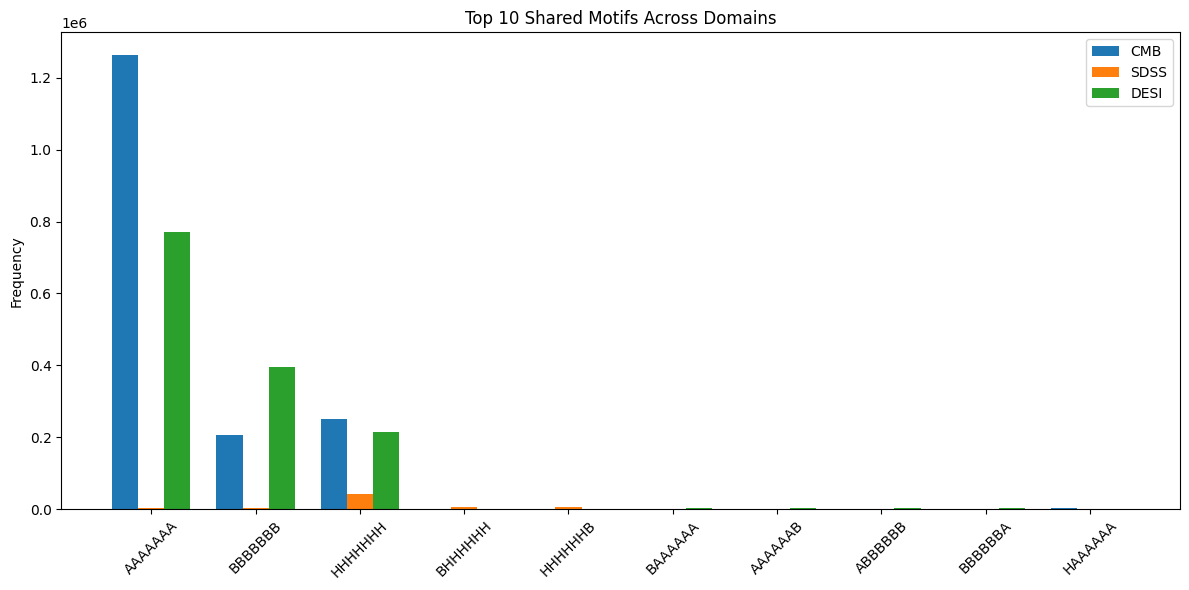

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# --- Load Updated Symbolic Streams ---
cmb_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream.npy", allow_pickle=True)
sdss_symbols = np.load("/content/drive/MyDrive/CMB Data/symbol_stream_sdss.npy", allow_pickle=True)
desi_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy", allow_pickle=True)

# --- Motif Extraction ---
def extract_motifs(symbols, k=7):
    return [''.join(symbols[i:i+k]) for i in range(len(symbols) - k)]

motifs_cmb = extract_motifs(cmb_symbols)
motifs_sdss = extract_motifs(sdss_symbols)
motifs_desi = extract_motifs(desi_symbols)

# --- Frequency Count ---
freq_cmb = Counter(motifs_cmb)
freq_sdss = Counter(motifs_sdss)
freq_desi = Counter(motifs_desi)

# --- Shared Motifs ---
shared = set(freq_cmb) & set(freq_sdss) & set(freq_desi)
shared_top = sorted(shared, key=lambda m: freq_cmb[m] + freq_sdss[m] + freq_desi[m], reverse=True)[:10]

# --- Table Display ---
print("Top 10 Shared Motifs (length=7):")
print("Motif      |      CMB     SDSS     DESI")
print("----------------------------------------")
for m in shared_top:
    print(f"{m:<10} | {freq_cmb[m]:>8} {freq_sdss[m]:>8} {freq_desi[m]:>8}")

# --- Barplot of Top Motifs ---
labels = [f"{m}" for m in shared_top]
data = {
    "CMB": [freq_cmb[m] for m in shared_top],
    "SDSS": [freq_sdss[m] for m in shared_top],
    "DESI": [freq_desi[m] for m in shared_top]
}

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, data["CMB"], width=width, label='CMB')
plt.bar(x, data["SDSS"], width=width, label='SDSS')
plt.bar(x + width, data["DESI"], width=width, label='DESI')
plt.xticks(x, labels, rotation=45)
plt.ylabel("Frequency")
plt.title("Top 10 Shared Motifs Across Domains")
plt.legend()
plt.tight_layout()
plt.show()

Cosine Distances (Motif Vector Space):
  SDSS ↔ CMB  = 0.646778
  DESI ↔ CMB  = 0.244221
  SDSS ↔ DESI = 0.740483

Motif Entropies:
  CMB  = 3.0615 bits
  SDSS = 10.3514 bits
  DESI = 3.1147 bits


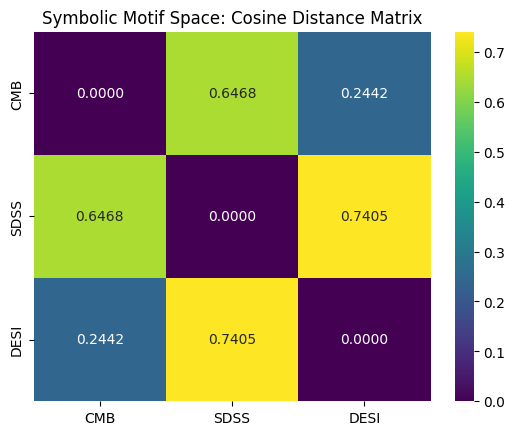

In [ ]:
import numpy as np
from collections import Counter
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load pre-encoded symbolic streams ---
cmb_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_cmb.npy", allow_pickle=True)
sdss_symbols = np.load("/content/drive/MyDrive/CMB Data/symbol_stream_sdss.npy", allow_pickle=True)
desi_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy", allow_pickle=True)

def motif_histogram(symbol_stream, motif_length=7):
    motifs = [tuple(symbol_stream[i:i+motif_length]) for i in range(len(symbol_stream) - motif_length)]
    return Counter(motifs)

def normalized_entropy(counter):
    total = sum(counter.values())
    probs = np.array(list(counter.values())) / total
    return -np.sum(probs * np.log2(probs))

def histogram_to_vector(counter, full_vocab):
    return np.array([counter.get(m, 0) for m in full_vocab])

# --- Generate motif histograms ---
motif_len = 7
hist_cmb = motif_histogram(cmb_symbols, motif_len)
hist_sdss = motif_histogram(sdss_symbols, motif_len)
hist_desi = motif_histogram(desi_symbols, motif_len)

# --- Combine full motif set ---
all_motifs = set(hist_cmb) | set(hist_sdss) | set(hist_desi)

# --- Vectorize histograms ---
vec_cmb = histogram_to_vector(hist_cmb, all_motifs)
vec_sdss = histogram_to_vector(hist_sdss, all_motifs)
vec_desi = histogram_to_vector(hist_desi, all_motifs)

# --- Normalize ---
vec_cmb = vec_cmb / np.sum(vec_cmb)
vec_sdss = vec_sdss / np.sum(vec_sdss)
vec_desi = vec_desi / np.sum(vec_desi)

# --- Compute cosine distances ---
cos_sdss_cmb = cosine(vec_sdss, vec_cmb)
cos_desi_cmb = cosine(vec_desi, vec_cmb)
cos_sdss_desi = cosine(vec_sdss, vec_desi)

# --- Compute motif entropies ---
H_cmb = normalized_entropy(hist_cmb)
H_sdss = normalized_entropy(hist_sdss)
H_desi = normalized_entropy(hist_desi)

# --- Display Results ---
print(f"Cosine Distances (Motif Vector Space):")
print(f"  SDSS ↔ CMB  = {cos_sdss_cmb:.6f}")
print(f"  DESI ↔ CMB  = {cos_desi_cmb:.6f}")
print(f"  SDSS ↔ DESI = {cos_sdss_desi:.6f}")
print()
print(f"Motif Entropies:")
print(f"  CMB  = {H_cmb:.4f} bits")
print(f"  SDSS = {H_sdss:.4f} bits")
print(f"  DESI = {H_desi:.4f} bits")

# --- Optional: Heatmap Visualization ---
sns.heatmap([[0, cos_sdss_cmb, cos_desi_cmb],
             [cos_sdss_cmb, 0, cos_sdss_desi],
             [cos_desi_cmb, cos_sdss_desi, 0]],
            xticklabels=["CMB", "SDSS", "DESI"],
            yticklabels=["CMB", "SDSS", "DESI"],
            cmap="viridis", annot=True, fmt=".4f")
plt.title("Symbolic Motif Space: Cosine Distance Matrix")
plt.show()

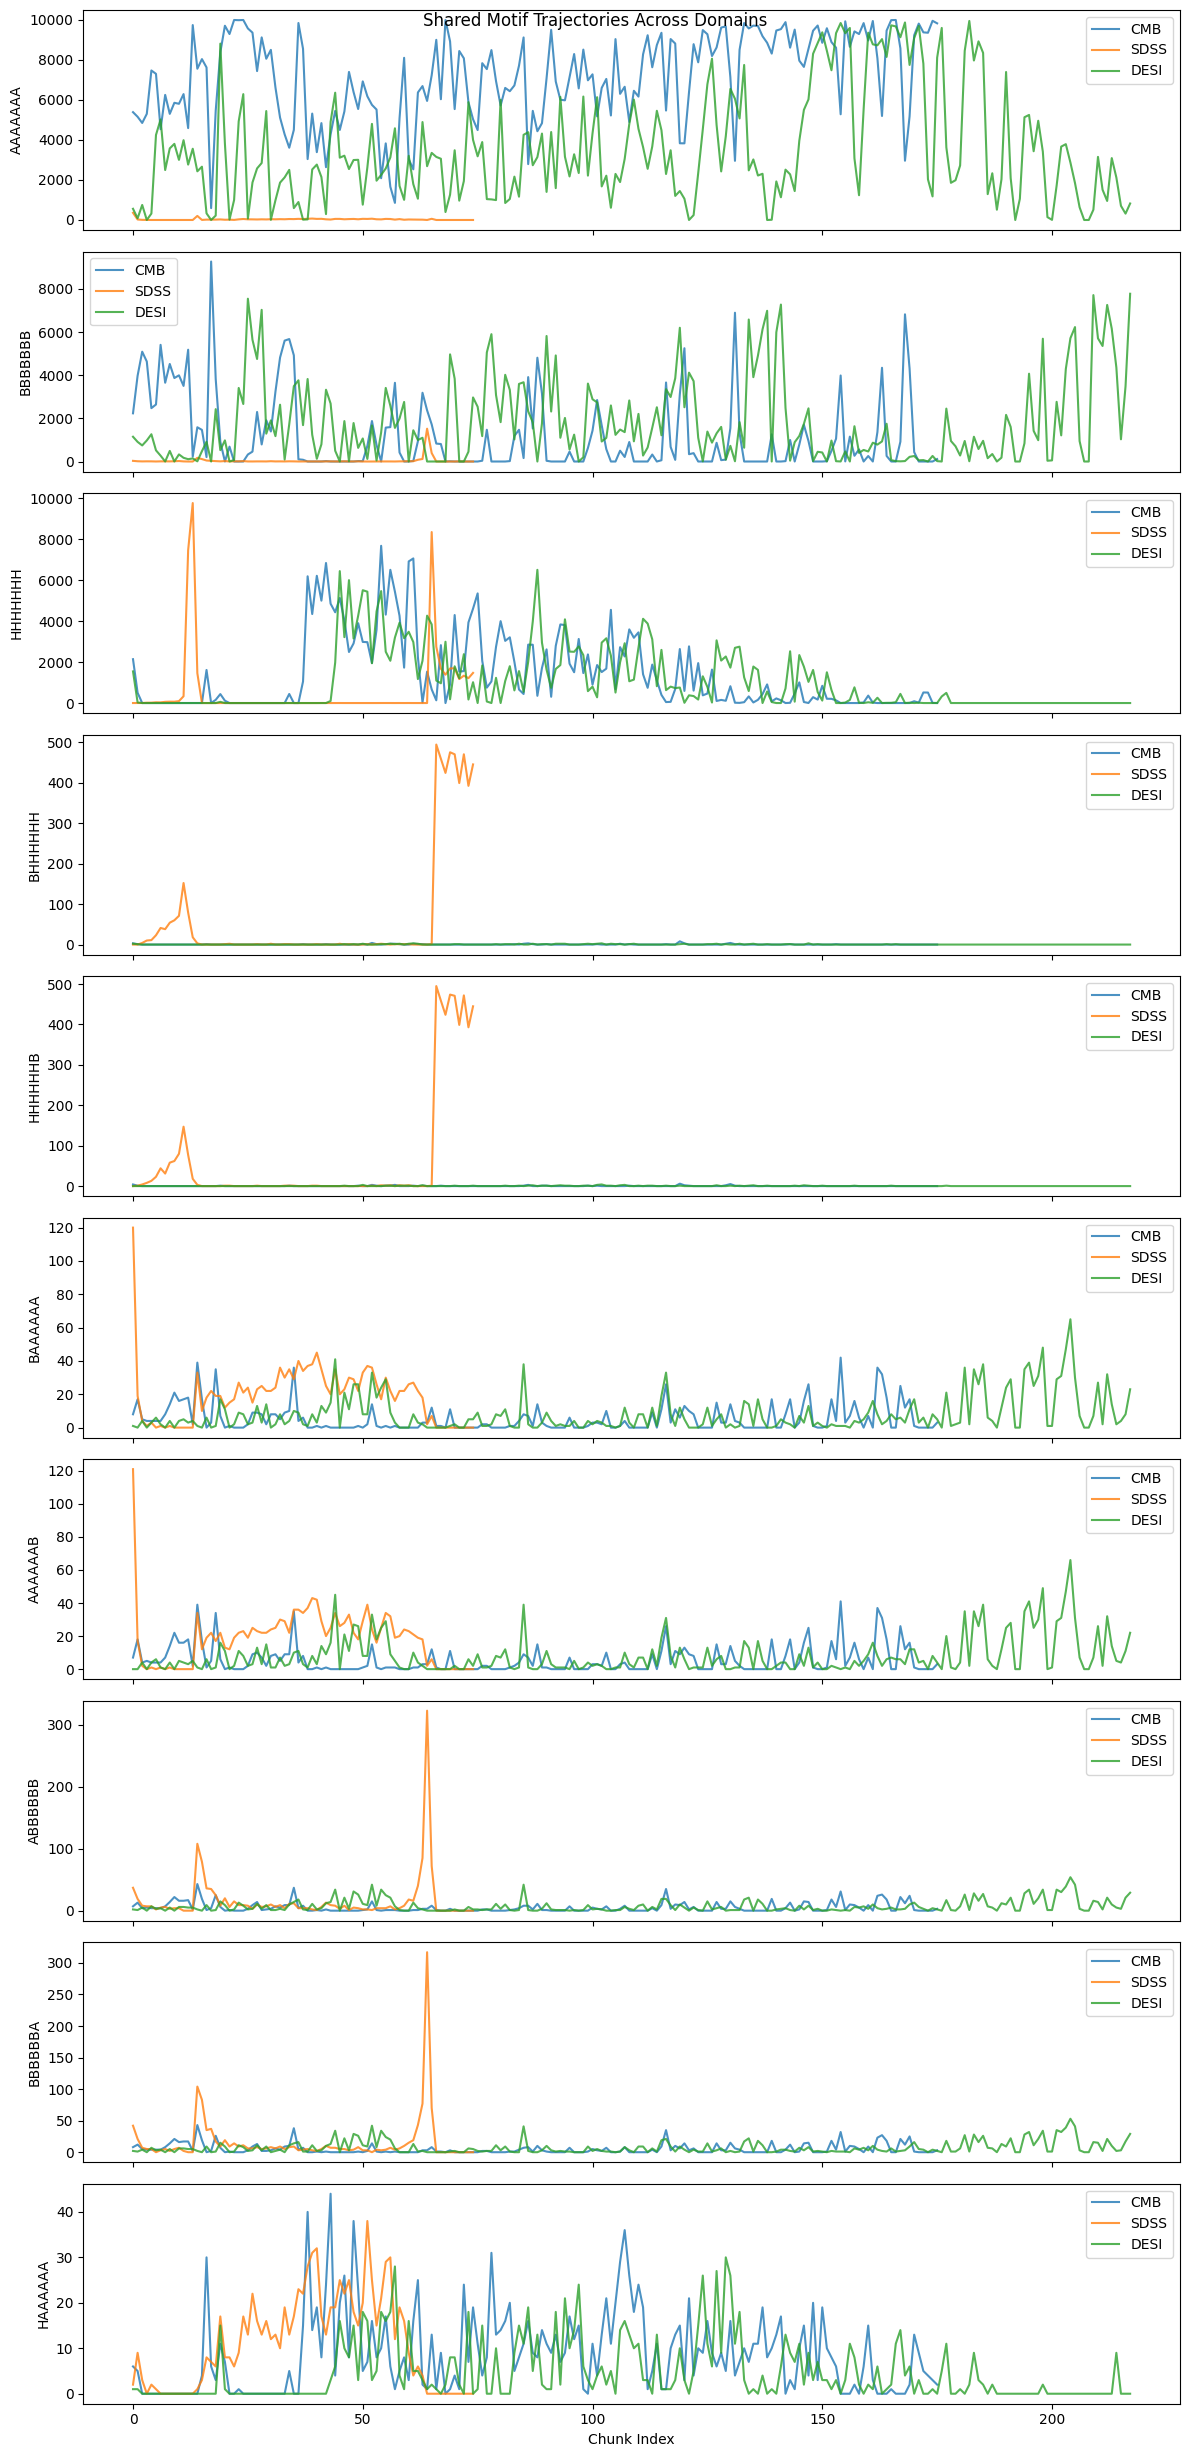

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

# --- Parameters ---
motif_length = 7
chunk_size = 10000

# --- Load Symbolic Streams ---
cmb_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream.npy", allow_pickle=True)
sdss_symbols = np.load("/content/drive/MyDrive/CMB Data/symbol_stream_sdss.npy", allow_pickle=True)
desi_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy", allow_pickle=True)

# --- Function to extract motifs per chunk ---
def extract_motif_trajectories(symbols, chunk_size, motif_length, top_motifs):
    counts = []
    for i in range(0, len(symbols) - chunk_size, chunk_size):
        chunk = symbols[i:i+chunk_size]
        motif_seq = [''.join(chunk[j:j+motif_length]) for j in range(len(chunk) - motif_length)]
        motif_counter = Counter(motif_seq)
        counts.append([motif_counter.get(m, 0) for m in top_motifs])
    return np.array(counts)

# --- Get top shared motifs from all domains ---
def get_shared_top_motifs(s1, s2, s3, motif_length, top_k=10):
    def extract(seq):
        return [''.join(seq[i:i+motif_length]) for i in range(len(seq) - motif_length)]
    m1 = set(extract(s1))
    m2 = set(extract(s2))
    m3 = set(extract(s3))
    shared = list(m1 & m2 & m3)
    total_counts = Counter(extract(s1) + extract(s2) + extract(s3))
    shared_sorted = sorted(shared, key=lambda m: total_counts[m], reverse=True)
    return shared_sorted[:top_k]

# --- Extract and plot ---
top_motifs = get_shared_top_motifs(cmb_symbols, sdss_symbols, desi_symbols, motif_length)

cmb_matrix = extract_motif_trajectories(cmb_symbols, chunk_size, motif_length, top_motifs)
sdss_matrix = extract_motif_trajectories(sdss_symbols, chunk_size, motif_length, top_motifs)
desi_matrix = extract_motif_trajectories(desi_symbols, chunk_size, motif_length, top_motifs)

# --- Plot Trajectories ---
fig, axes = plt.subplots(len(top_motifs), 1, figsize=(12, 2.5 * len(top_motifs)), sharex=True)
for idx, motif in enumerate(top_motifs):
    axes[idx].plot(cmb_matrix[:, idx], label='CMB', alpha=0.8)
    axes[idx].plot(sdss_matrix[:, idx], label='SDSS', alpha=0.8)
    axes[idx].plot(desi_matrix[:, idx], label='DESI', alpha=0.8)
    axes[idx].set_ylabel(f"{motif}")
    axes[idx].legend()
axes[-1].set_xlabel("Chunk Index")
fig.suptitle("Shared Motif Trajectories Across Domains")
plt.tight_layout()
plt.show()

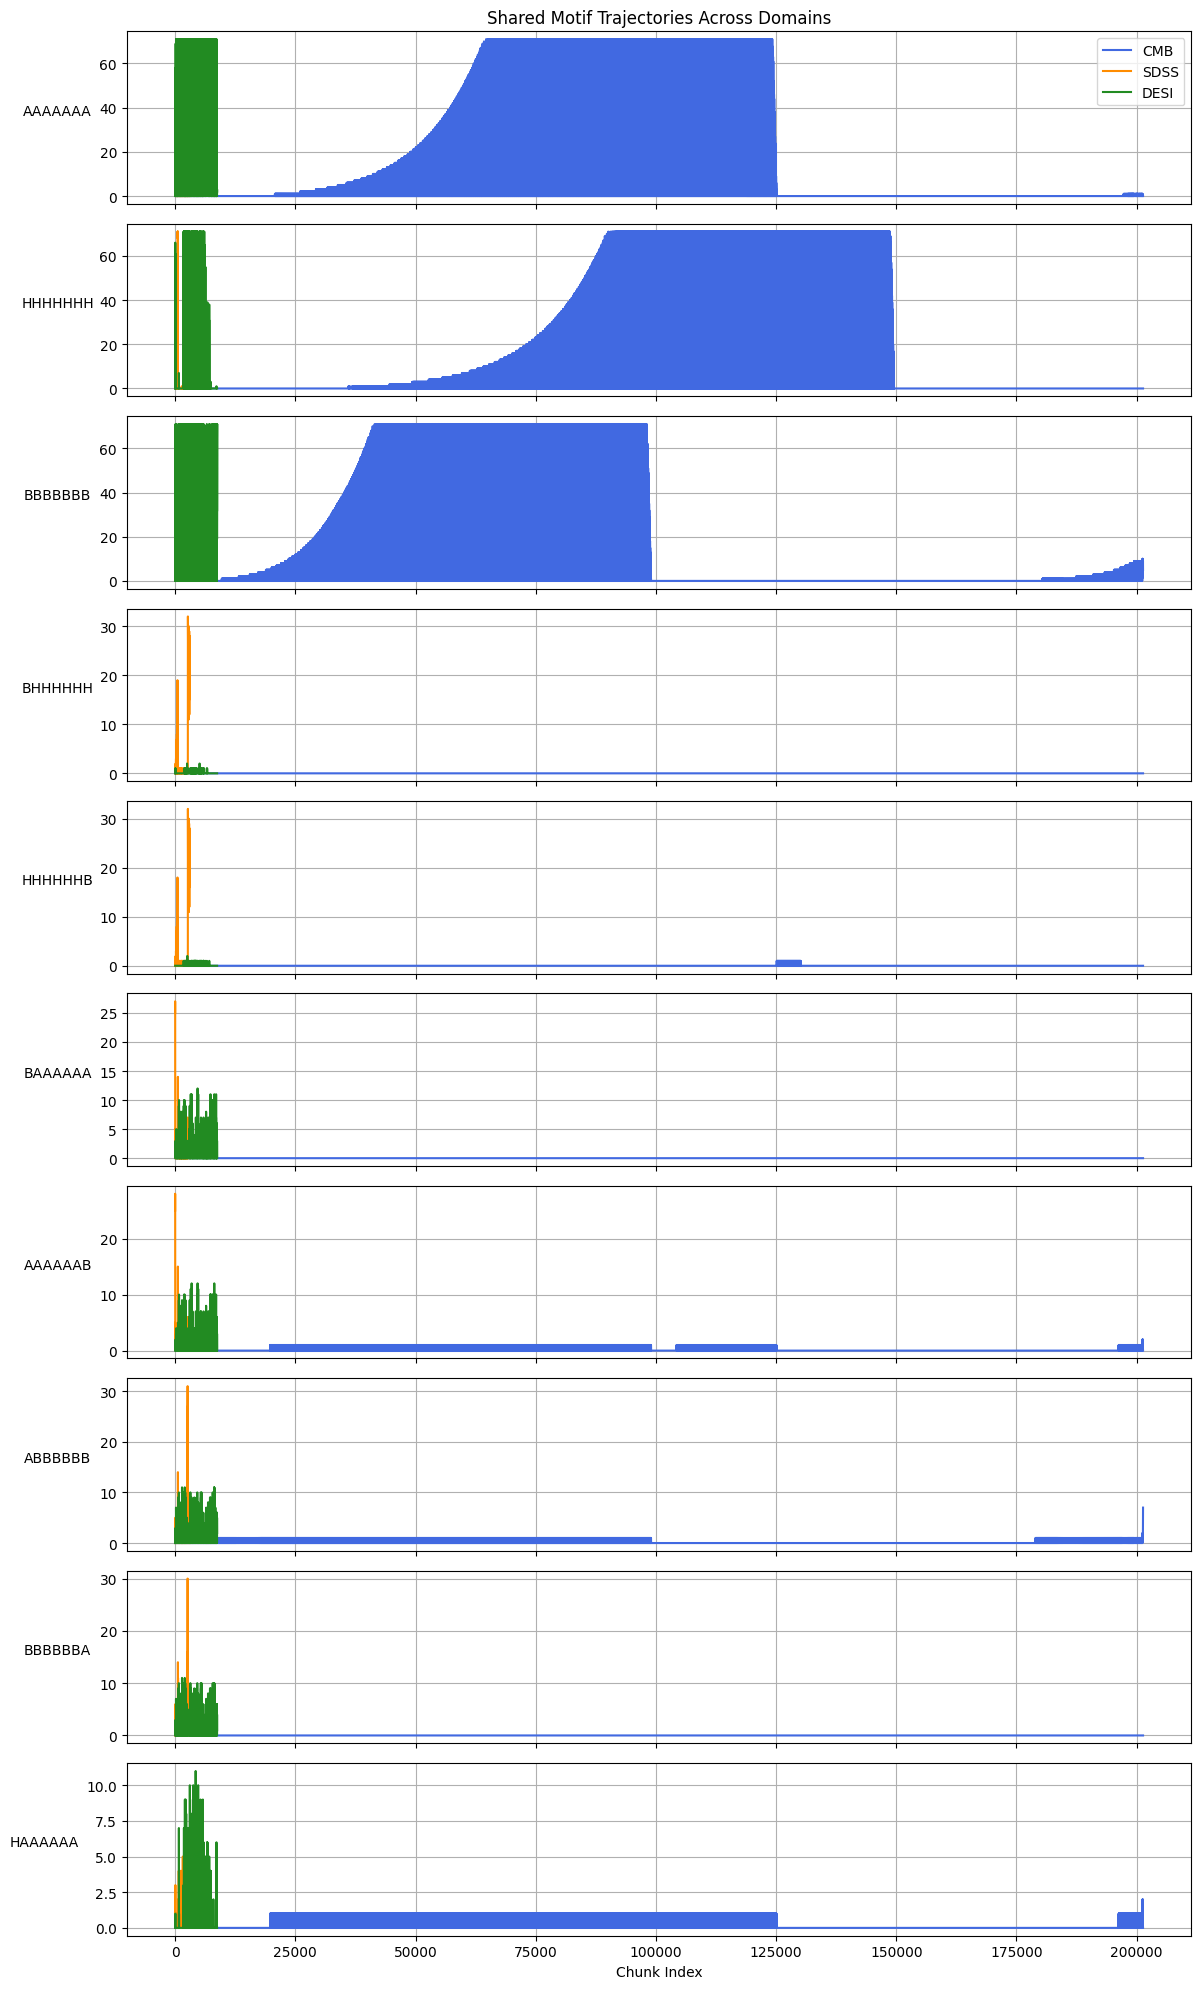

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# -----------------------------
# Optimized helper function
# -----------------------------
def motif_trajectory_counts(symbol_stream, motifs, window=500, step=250):
    stream_str = ''.join(symbol_stream.astype(str))
    n = len(stream_str)
    motif_counts = defaultdict(list)

    for i in range(0, n - window + 1, step):
        chunk = stream_str[i:i + window]
        for motif in motifs:
            motif_counts[motif].append(chunk.count(motif))

    return motif_counts

# -----------------------------
# Load symbolic streams (replace with your already-loaded arrays)
# -----------------------------
cmb_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_cmb.npy", allow_pickle=True)
sdss_symbols = np.load("/content/drive/MyDrive/CMB Data/symbol_stream_sdss.npy", allow_pickle=True)
desi_symbols = np.load("/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy", allow_pickle=True)

# -----------------------------
# Define motifs to track (adjust if needed)
# -----------------------------
motifs = ['AAAAAAA', 'HHHHHHH', 'BBBBBBB', 'BHHHHHH', 'HHHHHHB',
          'BAAAAAA', 'AAAAAAB', 'ABBBBBB', 'BBBBBBA', 'HAAAAAA']

# -----------------------------
# Compute motif trajectories
# -----------------------------
cmb_counts = motif_trajectory_counts(cmb_symbols, motifs)
sdss_counts = motif_trajectory_counts(sdss_symbols, motifs)
desi_counts = motif_trajectory_counts(desi_symbols, motifs)

# -----------------------------
# Plot
# -----------------------------
fig, axs = plt.subplots(len(motifs), 1, figsize=(12, len(motifs)*2), sharex=True)
for i, motif in enumerate(motifs):
    axs[i].plot(cmb_counts[motif], label="CMB", color="royalblue")
    axs[i].plot(sdss_counts[motif], label="SDSS", color="darkorange")
    axs[i].plot(desi_counts[motif], label="DESI", color="forestgreen")
    axs[i].set_ylabel(motif, rotation=0, labelpad=30)
    axs[i].grid(True)

axs[0].set_title("Shared Motif Trajectories Across Domains")
axs[-1].set_xlabel("Chunk Index")
axs[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

In [2]:
# --- Install dependency ---
!pip install nolds --quiet

# --- Imports ---
import numpy as np
from nolds import dfa

# --- Paths (confirmed) ---
paths = {
    "CMB": "/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_cmb.npy",
    "SDSS": "/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_sdss.npy",
    "DESI": "/content/drive/MyDrive/CMB Data/symbolic_spiral_stream_desi.npy"
}

# --- Symbol encoding (A=0, B=1, H=2) ---
symbol_map = {'A': 0, 'B': 1, 'H': 2}
def encode_stream(path, max_len=100000):
    symbols = np.load(path, allow_pickle=True)
    numeric = [symbol_map[s] for s in symbols if s in symbol_map]
    return np.array(numeric[:max_len])

# --- Compute DFA values ---
results = {}
for name, path in paths.items():
    print(f"Running DFA for {name}...")
    encoded = encode_stream(path)
    results[name] = dfa(encoded)

# --- Display results ---
for domain, dfa_value in results.items():
    print(f"{domain} DFA: {dfa_value:.5f}")

Running DFA for CMB...
Running DFA for SDSS...
Running DFA for DESI...
CMB DFA: 0.32375
SDSS DFA: 0.62260
DESI DFA: 1.21119
